## 14. Estimating the Spectrum

**Exercise 14.1**. Consider the variance of $\overline{S}(f)$ with the Daniell spectral window. Instead of using Equation (14.2.4) on page 355, use the fact that $2 \hat{S}(f) / S(f)$ has approximately a chi-square distribution with two degrees of freedom to show that the smoothed sample spectral density has an approximate variance of $S^2(f) / (2m + 1)$.

**Solution**.  The smoothed estimator of the spectral density is

$$ \overline{S}(f) = \sum_{k=-m}^m W_m(k) \hat{S}\left( f + \frac{k}{n} \right) \tag{14.1.3} $$

and the Daniell spectral window corresponds to weights

$$ W_m(k) = \frac{1}{2m + 1} \quad \text{for } -m \leq k \leq m \tag{14.1.4} $$

Therefore, using this smoothing window,

$$ \frac{\overline{S}(f)}{S(f)} = \frac{1}{2(2m + 1)} \sum_{k=-m}^m \frac{2 \hat{S}\left( f + \frac{k}{n} \right)}{S(f)} $$

Taking the variance,

$$ 
\begin{align}
\text{Var}\left[ \frac{\overline{S}(f)}{S(f)} \right] 
&= \frac{1}{4(2m+1)^2} \text{Var}\left[ \sum_{k=-m}^m \frac{2 \hat{S}\left( f + \frac{k}{n} \right)}{S(f)} \right] \\
&\approx \frac{1}{4(2m+1)^2} \sum_{k=-m}^m  \text{Var}\left[ \frac{2 \hat{S}\left( f + \frac{k}{n} \right)}{S(f)} \right] \\
&\approx \frac{1}{4(2m+1)^2} \sum_{k=-m}^m 2 \cdot 2 \\
&= \frac{1}{2m + 1}
\end{align}
$$

since the spectral sample density values at Fourier frequencies are approximately uncorrelated, and since the variance of a chi-square variable with 2 degrees of freedom is $2 \cdot \text{df} = 4$.

Therefore, taking $S(f)$ out as a constant factor, we obtain the result

$$ \text{Var}\left[\overline{S}(f)\right] \approx \frac{S^2(f)}{2m + 1} $$

**Exercise 14.2**. Consider various convolutions of the simple Daniell rectangular spectral window.

**(a)** Construct a panel of three plots similar to those shown in Exhibit 14.3 on page 354 but with the Daniell spectral window and with $m = 5$. The middle graph should be the convolution of two Daniell windows and the leftmost graph the convolution of three Daniell windows.

**(b)** Evaluate the bandwidths and degrees of freedom for each of the spectral windows constructed in part (a). Use $n = 100$.

**(c)** Construct another panel of three plots similar to those shown in Exhibit 14.3 but with the modified Daniell spectral window. This time use $m = 5$ for the first graph and convolve two with $m = 5$ and $m = 7$ for the second. Convolve three windows with $m$’s of 5, 7, and 11 for the third graph.

**(d)** Evaluate the bandwidths and degrees of freedom for each of the spectral windows constructed in part (c). Use $n = 100$.

**Solution**.  For integer $k$ and positive integer $m$, the Daniell regular spectral window for $m$ is defined as

$$ W_m(k) = \begin{cases}
1 / (2m + 1) &\text{for } -m \leq k \leq m \\
0 &\text{otherwise}
\end{cases} $$

while the modified Daniell regular spectral window divides in half the extreme weights and renormalizes the values so that they add up to 1, that is,

$$ W_m^{*}(k) = \begin{cases}
1 / (4m) &\text{for } k \in \{ -m, m \} \\
1 / (2m) &\text{for } -m < k < m \\
0 &\text{otherwise}
\end{cases} $$

In [1]:
require(ggplot2)
require(ggpubr)
require(data.table)

Loading required package: ggplot2

Loading required package: ggpubr

Loading required package: magrittr

Loading required package: data.table



In [2]:
m = 5

# Create lag vectors
k1 = -m:m
k2 = (-2*m):(2*m)
k3 = (-3*m):(3*m)

# Use stats::kernel function to compute the coefficients for us
w1 = stats::kernel('daniell', c(m))$coef
w2 = stats::kernel('daniell', c(m, m))$coef
w3 = stats::kernel('daniell', c(m, m, m))$coef

# Translate to symmetric representation
w1 = c(rev(w1[-1]), w1)
w2 = c(rev(w2[-1]), w2)
w3 = c(rev(w3[-1]), w3)

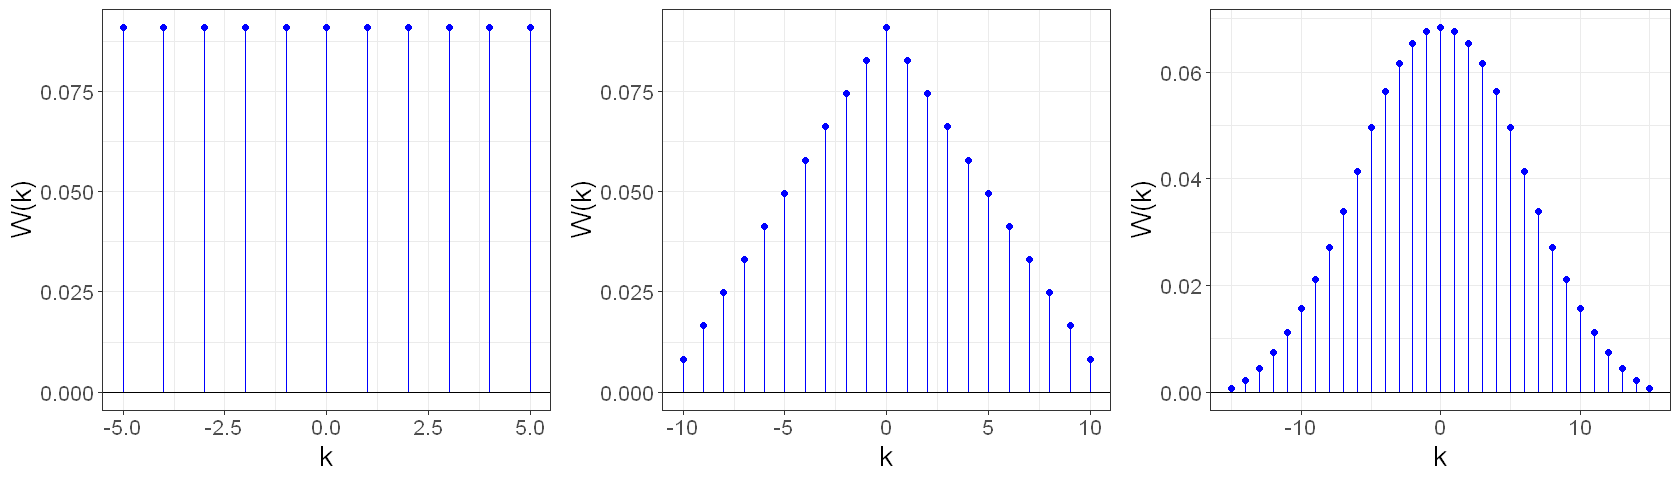

In [3]:
plot_kernel <- function(k, w) {
  ggplot() +
    geom_hline(yintercept=0, color='black') +
    geom_point(aes(x=k, y=w), color='blue') +
    geom_segment(aes(x=k, y=w, xend=k, yend=0), color='blue') +
    xlab('k') + ylab('W(k)') +
    theme_bw() + theme(text = element_text(size=16))
}

p1 <- plot_kernel(k=k1, w=w1)
p2 <- plot_kernel(k=k2, w=w2)
p3 <- plot_kernel(k=k3, w=w3)

options(repr.plot.width=14, repr.plot.height=4)
ggarrange(p1, p2, p3, nrow=1, ncol=3)

**(b)**  The bandwidth of the spectral window is defined as

$$ BW = \frac{1}{n} \sqrt{\sum_{k=-m}^m k^2 W_m(k)} \tag{14.3.1} $$

and the degrees of freedom are given as

$$ \nu = \frac{2}{\sum_{k=-m}^m W_m^2(k)} \tag{14.4.2} $$

In [4]:
spectral_window_bandwidth <- function(k, w, n) {
    sqrt(sum(k**2 * w)) / n
}

spectral_window_df <- function(w) {
    2 / sum(w**2)
}

In [5]:
print_results <- function(title, w, k) {
    bw = spectral_window_bandwidth(k=k, w=w, n=100)
    df = spectral_window_df(w=w)
    print(title, quote=F)
    print(paste(c('  Bandwidth: ', round(bw, 5)), collapse=''), quote=F)
    print(paste(c('  Degrees of freedom: ', round(df, 5)), collapse=''), quote=F)
}

print_results(title='Window 1', k=k1, w=w1)
print_results(title='Window 2', k=k2, w=w2)
print_results(title='Window 3', k=k3, w=w3)

[1] Window 1
[1]   Bandwidth: 0.03162
[1]   Degrees of freedom: 22
[1] Window 2
[1]   Bandwidth: 0.04472
[1]   Degrees of freedom: 32.8642
[1] Window 3
[1]   Bandwidth: 0.05477
[1]   Degrees of freedom: 39.84931


**(c)**

In [6]:
m = 5

# Create lag vectors
k1 = -5:5
k2 = (-(5+7)):(5+7)
k3 = (-(5+7+11)):(5+7+11)

# Use stats::kernel function to compute the coefficients for us
w1 = stats::kernel('modified.daniell', c(5))$coef
w2 = stats::kernel('modified.daniell', c(5, 7))$coef
w3 = stats::kernel('modified.daniell', c(5, 7, 11))$coef

# Translate to symmetric representation
w1 = c(rev(w1[-1]), w1)
w2 = c(rev(w2[-1]), w2)
w3 = c(rev(w3[-1]), w3)

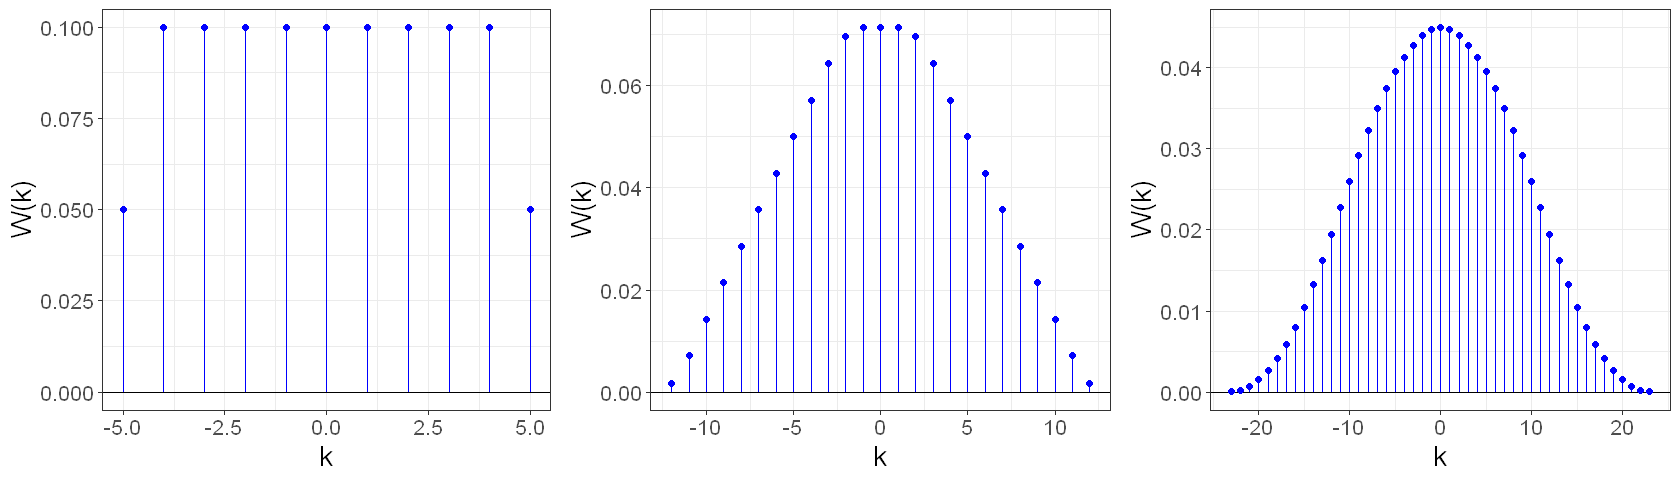

In [7]:
plot_kernel <- function(k, w) {
  ggplot() +
    geom_hline(yintercept=0, color='black') +
    geom_point(aes(x=k, y=w), color='blue') +
    geom_segment(aes(x=k, y=w, xend=k, yend=0), color='blue') +
    xlab('k') + ylab('W(k)') +
    theme_bw() + theme(text = element_text(size=16))
}

p1 <- plot_kernel(k=k1, w=w1)
p2 <- plot_kernel(k=k2, w=w2)
p3 <- plot_kernel(k=k3, w=w3)

options(repr.plot.width=14, repr.plot.height=4)
ggarrange(p1, p2, p3, nrow=1, ncol=3)

**(d)**

In [8]:
print_results(title='Window 1', k=k1, w=w1)
print_results(title='Window 2', k=k2, w=w2)
print_results(title='Window 3', k=k3, w=w3)

[1] Window 1
[1]   Bandwidth: 0.02915
[1]   Degrees of freedom: 21.05263
[1] Window 2
[1]   Bandwidth: 0.05
[1]   Degrees of freedom: 36.97241
[1] Window 3
[1]   Bandwidth: 0.08093
[1]   Degrees of freedom: 59.53696


**Exercise 14.3**. For the Daniell rectangular spectral window show that

**(a)** 

$$ \frac{1}{n^2} \sum_{k=-m}^m k^2 W_m(k) = \frac{2}{n^2(2m+1)} \left( \frac{m^3}{3} + \frac{m^2}{2} + \frac{m}{6} \right) $$

**(b)** Show that if $m$ is chosen as $m = c\sqrt{n}$ for any constant $c$, then the right-hand side of the expression in part (a) tends to zero as $n$ goes to infinity.

**(c)** Show that if $m = c\sqrt{n}$ for any constant $c$, then the approximate variance of the smoothed spectral density given by the right-hand side of Equation (14.2.4) on page 355 tends to zero as n tends to infinity.

**Solution**.

**(a)**

$$
\begin{align}
\frac{1}{n^2} \sum_{k=-m}^m k^2 W_m(k) &= \frac{1}{2m+1} \frac{1}{n^2} \sum_{k=-m}^m k^2 \\
&= \frac{2}{2m+1} \frac{1}{n^2} \sum_{k=1}^m k^2 \\
&= \frac{2}{n^2(2m+1)} \left( \frac{m(m+1)(2m+1)}{6} \right) \\
&= \frac{2}{n^2(2m+1)} \left( \frac{m^3}{3} + \frac{m^2}{2} + \frac{m}{6} \right)
\end{align}
$$

where the formula for the sum of consecutive squares may be proved by induction on $m$:

$$ \sum_{k=1}^m k^2 = \frac{m(m+1)(2m+1)}{6} $$

The result holds for $m = 1$, as $1 = 1$, and if the result holds for $m$,

$$ \sum_{k=1}^{m+1} k^2 = (m+1)^2 + \sum_{k=1}^m k^2 = (m+1)^2 + \frac{m(m+1)(2m+1)}{6} = \frac{(m+1)(m+2)(2m+3)}{6} $$

showing our result.

**(b)**  The right hand side of the expression is $O(m^2 / n^2)$, so if $m = c \sqrt{n}$ for some constant $c$, the expression overall is $O(1 / n)$, and so it tends to zero as $n$ tends to infinity.

**(c)** Equation (14.2.4) provides an estimate for the variance of the smoothed spectral density,

$$ \text{Var}\left[ \overline{S}(f) \right] \approx S^2(f) \sum_{k=-m}^m W_m^2(k) \tag{14.2.4} $$

But for the Daniell window, $W_m(k) = 1 / (2m + 1)$ for these values of $k$, so the right-hand side becomes

$$ S^2(f) \sum_{k=-m}^m W_m^2(k) = \frac{S^2(f)}{2m + 1} $$

If $m = c \sqrt{n}$, then this expression tends to 0 as $n \rightarrow \infty$.

**Exercise 14.4**.  Suppose that the distribution of $\overline{S}(f)$ is to be approximated by a multiple of a chi-square variable with degrees of freedom $\nu$, so that $\overline{S}(f) \approx c \chi_\nu^2$. Using the approximate variance of given in Equation (14.2.4) on page 355 and the fact that $\overline{S}(f)$ is approximately unbiased, equate means and variances and find the values for $c$ and $\nu$ (thus establishing Equation (14.4.2) on page 356).

**Solution**.  Using the given approximation, we have

$$ \text{E}\left[\overline{S}(f)\right] \approx \text{E}\left[c \chi_\nu^2\right] = c \nu $$

but the approximate unbiasedness also tells us that $\text{E}\left[\overline{S}(f)\right] \approx S(f)$, so we have 

$$ c \nu \approx S(f) $$

Using the given approximation, we have

$$ \text{Var}\left[ \overline{S}(f) \right] \approx \text{Var}\left[c \chi_\nu^2 \right] = 2 c^2 \nu $$

but the approximation from Equation (14.2.4) also tells us that

$$ \text{Var}\left[ \overline{S}(f) \right] \approx S^2(f) \sum_{k=-m}^m W_m^2(k) $$

so we have

$$ c^2 \nu \approx \frac{S^2(f)}{2} \sum_{k=-m}^m W_m^2(k) $$

From the approximations for $c\nu$ and $c^2 \nu$ we get

$$
c \approx \frac{S(f)}{2} \sum_{k=-m}^m W_m^2(k) 
\quad \text{and} \quad
\nu \approx \frac{2}{\sum_{k=-m}^m W_m^2(k)}
$$

establishing the approximation for $\nu$ from Equation (14.4.2).

**Exercise 14.5**.  Construct a time series of length $n = 48$ according to the expression 

$$ Y_t = \sin \left[ 2 \pi (0.28) t \right] $$

Display the periodogram of the series and explain its appearance.

**Solution**.

In [9]:
source('periodogram.R')

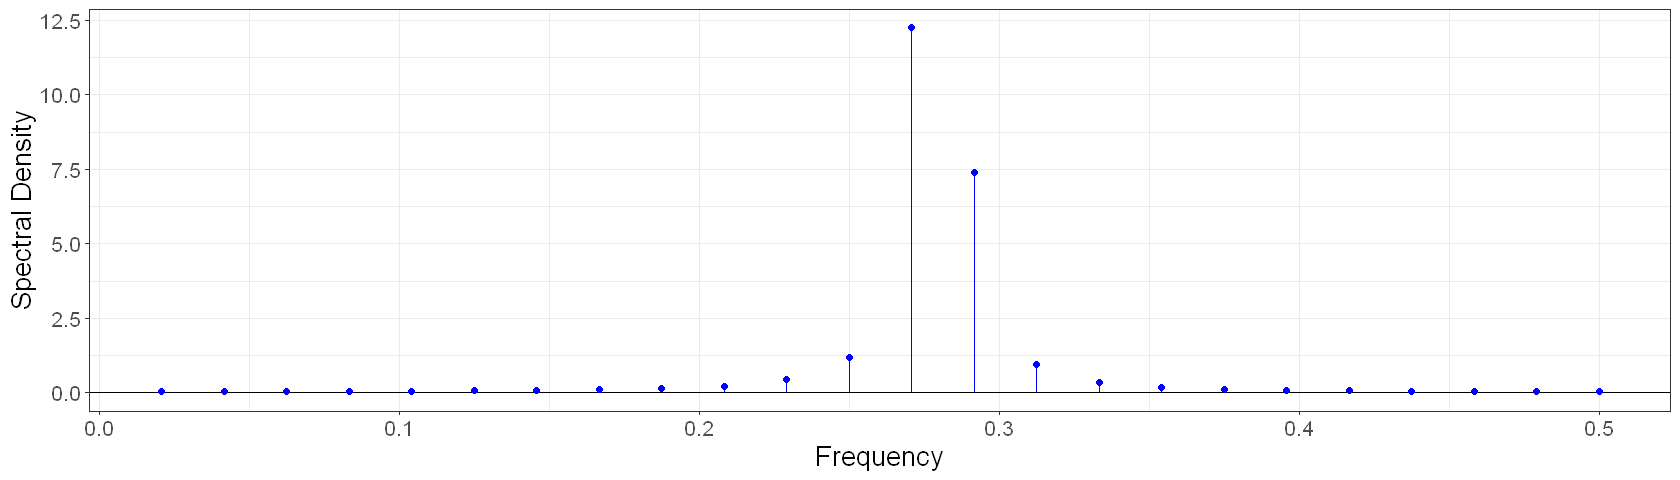

In [10]:
n = 48
t = 1:n
Y = sin(2 * pi * 0.28 * t)

p = periodogram(Y, plot=F)
f = p$freq
Pxx = p$spec

ggplot() + 
  geom_hline(yintercept=0, color='black') +
  geom_point(aes(x=f, y=Pxx), color='blue') +
  geom_segment(aes(x=f, y=Pxx, xend=f, yend=0), color='blue') +
  xlab('Frequency') + ylab('Spectral Density') +
  theme_bw() + theme(text = element_text(size=16))

Rather than displaying a single peak, the frequencies are smoothed around Fourier frequencies near 0.28.  This occurs as the series of sines as defined with phase $2 \pi \cdot 0.28$ is no longer orthogonal to the series of cosines and sines with phases corresponding to the Fourier frequencies.

**Exercise 14.6**.  Estimate the spectrum of the Los Angeles annual rainfall time series. The data are in the file named `larain`. Because of the skewness in the series, use the logarithms of the raw rainfall values. The square root of the series length suggests a value for the *span* of about 11. Use the modified Daniell spectral window, and be sure to set the vertical limits of the plot so that you can see the whole confidence interval guide. Comment on the estimated spectrum.

**Solution**.

In [11]:
Y = log(fread('../data/larain.dat')[['larain']])

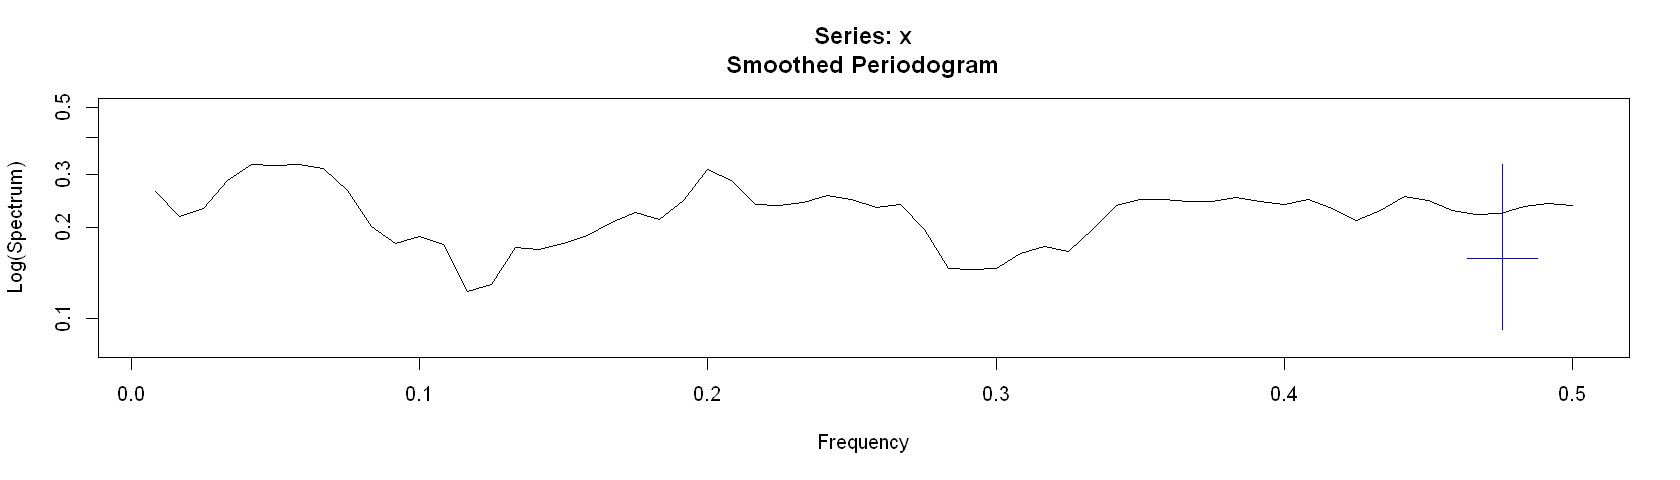

In [12]:
s = spec(Y, spans=c(11), kernel='modified.daniell', ylim=c(.08,0.5), sub='', ylab='Log(Spectrum)', xlab='Frequency')

**Exercise 14.7**. The file named `spots1` contains annual sunspot numbers for 306 years from 1700 through 2005.

**(a)** Display the time series plot of these data. Does stationarity seem reasonable for this series?

**(b)** Estimate the spectrum using a modified Daniell spectral window convoluted with itself and a *span* of 3 for both. Interpret the plot.

**(c)** Estimate the spectrum using an AR model with the order chosen to minimize the AIC. Interpret the plot. What order was selected?

**(d)** Overlay the estimates obtained in parts (b) and (c) above onto one plot. Do they agree to a reasonable degree?

**Exercise 14.8**. Consider the time series of average monthly temperatures in Dubuque, Iowa. The data are in the file named `tempdub` and cover from January 1964 to December 1975 for an $n$ of 144.

**(a)** Estimate the spectrum using a variety of span values for the modified Daniell spectral window.

**(b)** In your opinion, which of the estimates in part (a) best represents the spectrum of the process? Be sure to use bandwidth considerations and confidence limits to back up your argument.

**Exercise 14.9**. An EEG (electroencephalogram) time series is given in the data file named `eeg`. An electroencephalogram is a noninvasive test used to detect and record the electrical activity generated in the brain. These data were measured at a sampling rate of 256 per second and came from a patient suffering a seizure. The total record length is $n = \text{13,000}$ -- or slightly less than one minute.

**(a)** Display the time series plot and decide if stationarity seems reasonable.

**(b)** Estimate the spectrum using a modified Daniell spectral window convolved with itself and a *span* of 51 for both components of the convolution. Interpret the plot.

**(c)** Estimate the spectrum using an AR model with the order chosen to minimize the AIC. Interpret the plot. What order was selected?

**(d)** Overlay the estimates obtained in parts (b) and (c) above onto one plot. Do they agree to a reasonable degree?

**Exercise 14.10**. The file named `electricity` contains monthly U. S. electricity production values from January 1994 to December 2005. A time series plot of the logarithms of these values is shown in Exhibit 11.14 on page 264. Since there is an upward trend and increasing variability at higher levels in these data, use the first difference of the logarithms for the remaining analysis.

**(a)** Construct a time series plot of the first difference of the logarithms of the electricity values. Does a stationary model seem warranted at this point?

**(b)** Display the smoothed spectrum of the first difference of the logarithms using a modified Daniell spectral window and *span* values of 25, 13, and 7. Interpret the results.

**(c)** Now use a spectral window that is a convolution of two modified Daniell windows each with *span* $= 3$. Also use a 10% taper. Interpret the results.

**(d)** Estimate the spectrum using an AR model with the order chosen to minimize the AIC. Interpret the plot. What order was selected?

**(e)** Overlay the estimates obtained in parts (c) and (d) above onto one plot. Do they agree to a reasonable degree?